# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Import Dataset

In [2]:
dataset = pd.read_csv('iris_species.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


# Splitting Dataset

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.77029021e+00, -1.11093453e+00, -2.29778941e+00,
        -1.36286418e+00],
       [ 3.81787899e-02,  1.20351240e+00, -2.41872570e-01,
        -1.79822358e-01],
       [-5.64644209e-01,  3.35594805e-01,  2.41872570e-01,
         2.93394373e-01],
       [ 1.88884540e-01, -2.43016927e-01,  8.46553995e-01,
         1.23982783e+00],
       [-1.12526960e-01, -2.43016927e-01, -1.20936285e-01,
         2.93394373e-01],
       [ 3.39590289e-01,  9.14206537e-01,  2.41872570e-01,
         7.66611103e-01],
       [ 1.69594204e+00, -2.43016927e-01,  1.45123542e+00,
         5.30002738e-01],
       [ 6.41001789e-01,  6.24900671e-01,  8.46553995e-01,
         1.71304456e+00],
       [ 2.14805929e+00, -8.21628660e-01,  2.41872570e+00,
         1.47643620e+00],
       [-7.15349959e-01, -5.32322793e-01,  2.41872570e-01,
         5.30002738e-01],
       [ 6.41001789e-01,  3.35594805e-01,  1.20936285e-01,
         5.67860076e-02],
       [-1.12526960e-01, -1.97885212e+00, -4.83745140e-01,
      

# **Model building**

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [7]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']]


# **Performance Measure - Confusion Matrix, Accuracy**

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  2]
 [ 0 12]]


0.92

**Gain Chart**

In [ ]:
pip install scikit-plot

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

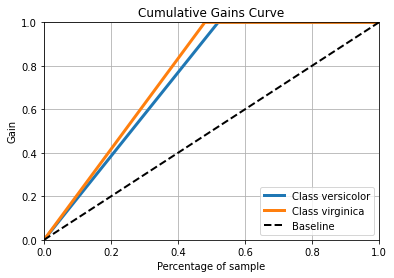

In [9]:
import scikitplot as skplt
pred = classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, pred)

**Lift chart**

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

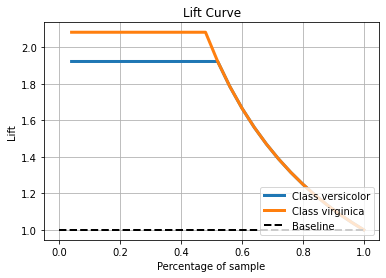

In [10]:
skplt.metrics.plot_lift_curve(y_test,pred)